In [99]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import wordpunct_tokenize, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
# Reading in the data

Combined_Lyrics = pd.read_csv('Combined_Lyrics.csv')

In [57]:
# Creating a list of stop words, creating a lemmatizer

sw = stopwords.words('english')
wn = WordNetLemmatizer()

In [58]:
# Vectorizing lyrics data

cv = CountVectorizer(stop_words=sw, min_df=50)
X_cv = cv.fit_transform(Combined_Lyrics['Lyrics'])

In [59]:
# Converting the vectorized lyrics object to a dataframe
Vectorized_df = pd.DataFrame(X_cv.toarray(), columns = cv.get_feature_names())
# Appending on Artist and Genre
Vectorized_df = pd.concat([Vectorized_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)
# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Vectorized_df = Vectorized_df[ cols_to_move + [ col for col in Vectorized_df.columns if col not in cols_to_move ] ]

In [60]:
# Tfid Vectorzing lyrics data

tf = TfidfVectorizer(max_df = 0.95, min_df = 50)
X_tf = tf.fit_transform(Combined_Lyrics['Lyrics'])

In [61]:
# Converting tfid lyrics to object to a dataframe
Tfid_df = pd.DataFrame(X_tf.toarray(), columns=tf.get_feature_names())
Tfid_df = pd.concat([Tfid_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)
# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Tfid_df = Tfid_df[ cols_to_move + [ col for col in Tfid_df.columns if col not in cols_to_move ] ]

In [62]:
#split data in to x and y

y = Vectorized_df['Genre']
# text = df['review'].values.astype('U')
text = Vectorized_df.drop(['Genre','Artist'], axis = 1)

In [63]:
#make train and test
text_train, text_test, y_train, y_test = train_test_split(text,y, stratify = y, random_state=117, test_size=.4)

In [64]:
text_train

,10,100,11,12,1embedshare,20,24,2embedshare,30,3embedshare,...,yo,york,youembedshare,young,younger,youth,yuh,yup,zero,zone
563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9433,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6325,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14,0,0,0
11133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Naive Bayes

In [72]:
nb = MultinomialNB()
nb.fit(text_train, y_train)
y_hat = nb.predict(text_test)
y_hat[0:3]
y_prob = nb.predict_proba(text_test)[:,1]
y_prob
matrix = confusion_matrix(y_test, y_hat)
print(matrix.diagonal()/matrix.sum(axis = 1))
print(metrics.accuracy_score(y_test, y_hat))
metrics.precision_score(y_test, y_hat, average = 'weighted')
metrics.recall_score(y_test, y_hat, average = 'weighted')
print(metrics.classification_report(y_test, y_hat))
# macro average of precision
np.round((.88+.98)/2,2)
# weighted average of precision
np.round(((.88*224)+(.98*1448))/1672,2)
# nb_auc = roc_auc_score(y_test, y_prob, multi_class = 'ovr')
# fpr, tpr, thresh = roc_curve(y_test, y_prob)

[[671  53  18  98 128]
 [ 72 193  22 126 107]
 [ 20  60 903  62  15]
 [ 63 115  52 538 187]
 [181  89  24 237 780]]
[0.69318182 0.37115385 0.85188679 0.56335079 0.59496568]
0.6408392189447445
              precision    recall  f1-score   support

     Country       0.67      0.69      0.68       968
         Pop       0.38      0.37      0.37       520
         Rap       0.89      0.85      0.87      1060
         RnB       0.51      0.56      0.53       955
        Rock       0.64      0.59      0.62      1311

    accuracy                           0.64      4814
   macro avg       0.62      0.61      0.61      4814
weighted avg       0.65      0.64      0.64      4814



0.97

In [ ]:
# plt.plot(fpr, tpr, color='orange', label='NB')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()

### Linear Regression

In [66]:
lr = LogisticRegression(solver='liblinear', C=1, max_iter = 1000)
lr.fit(text_train, y_train)
y_hat = lr.predict(text_test)
y_hat[0:3]
y_prob = lr.predict_proba(text_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat,)
metrics.precision_score(y_test, y_hat, average = 'weighted')
metrics.recall_score(y_test, y_hat, average = 'weighted')
print(metrics.classification_report(y_test, y_hat))
# lr_auc = roc_auc_score(y_test, y_prob, average = 'weighted', multi_class = 'ovr')
# fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

     Country       0.64      0.67      0.66       968
         Pop       0.30      0.24      0.26       520
         Rap       0.89      0.87      0.88      1060
         RnB       0.48      0.48      0.48       955
        Rock       0.61      0.65      0.63      1311

    accuracy                           0.63      4814
   macro avg       0.59      0.58      0.58      4814
weighted avg       0.62      0.63      0.62      4814



### Decision Tree 

In [67]:
clf = DecisionTreeClassifier()
clf.fit(text_train, y_train)
y_hat = clf.predict(text_test)
y_hat[0:3]
y_prob = clf.predict_proba(text_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat, average = 'weighted')
metrics.recall_score(y_test, y_hat, average = 'weighted')
print(metrics.classification_report(y_test, y_hat))
# clf_auc = roc_auc_score(y_test, y_prob)
# fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

     Country       0.45      0.46      0.45       968
         Pop       0.25      0.21      0.23       520
         Rap       0.88      0.85      0.87      1060
         RnB       0.37      0.38      0.38       955
        Rock       0.49      0.52      0.51      1311

    accuracy                           0.52      4814
   macro avg       0.49      0.49      0.49      4814
weighted avg       0.52      0.52      0.52      4814



### Random Forest

In [68]:
rf = RandomForestClassifier()
rf.fit(text_train, y_train)
y_hat = rf.predict(text_test)
y_hat[0:3]
y_prob = rf.predict_proba(text_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat, average = 'weighted')
metrics.recall_score(y_test, y_hat, average = 'weighted')
print(metrics.classification_report(y_test, y_hat))
# rf_auc = roc_auc_score(y_test, y_prob)
# fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

     Country       0.69      0.61      0.65       968
         Pop       0.53      0.04      0.08       520
         Rap       0.87      0.95      0.91      1060
         RnB       0.55      0.50      0.52       955
        Rock       0.56      0.81      0.66      1311

    accuracy                           0.65      4814
   macro avg       0.64      0.58      0.56      4814
weighted avg       0.65      0.65      0.62      4814



### Gradient Boost

In [69]:
gb = GradientBoostingClassifier()
gb.fit(text_train, y_train)
y_hat = gb.predict(text_test)
y_hat[0:3]
y_prob = gb.predict_proba(text_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat, average = 'weighted')
metrics.recall_score(y_test, y_hat, average = 'weighted')
print(metrics.classification_report(y_test, y_hat))
# gb_auc = roc_auc_score(y_test, y_prob)
# fpr_gb, tpr_gb, thresh_gb = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

     Country       0.72      0.59      0.65       968
         Pop       0.43      0.11      0.17       520
         Rap       0.91      0.91      0.91      1060
         RnB       0.54      0.51      0.52       955
        Rock       0.56      0.81      0.66      1311

    accuracy                           0.65      4814
   macro avg       0.63      0.59      0.58      4814
weighted avg       0.65      0.65      0.63      4814



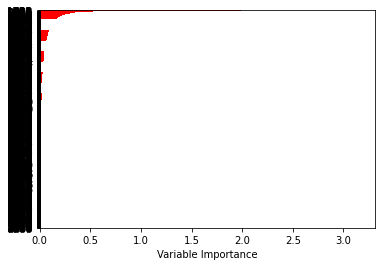

In [76]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}) #index=X_train.columns)
Importance = Importance.iloc[rf.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

<AxesSubplot:xlabel='Importance'>

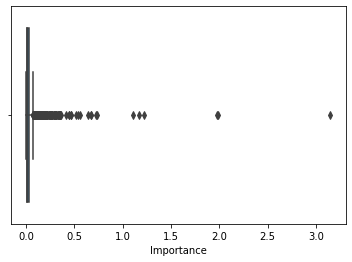

In [103]:
Importance.sort_values('Importance', axis=0, ascending=False).head(50)
sns.boxplot(x = Importance.sort_values('Importance', axis=0, ascending=False).Importance)

In [96]:
Vectorized_df.columns[[1512,1513,1514]]
Vectorized_df.columns[[883,884,885]]
Vectorized_df.columns[[202,203,201]]
Vectorized_df.columns[[1329,1330,1331]]
Vectorized_df.columns[[2234,2235,2236]]

Index(['sweat', 'sweet', 'sweeter'], dtype='object')